In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=2, random_state=2)

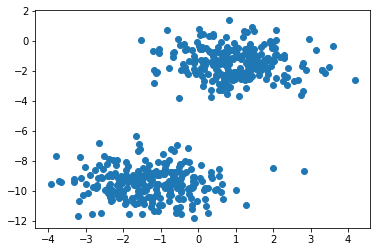

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()


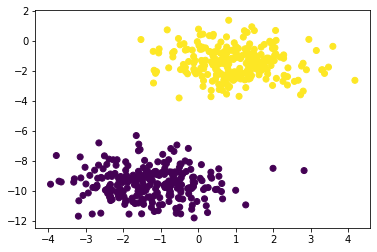

In [4]:
plt.scatter(X[:, 0], X[:, 1],c = y)
plt.show()


In [5]:
y.shape #it gives problem (500,) <== vector

(500,)

In [6]:
y = y.reshape(-1, 1)

In [7]:
y.shape

(500, 1)

In [8]:
ones = np.ones((500,1))
X_ = np.hstack((ones, X)) #this is forappending X0 in col 

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
X_train, X_test, y_train, y_test = train_test_split( X_, y, test_size=0.33, random_state=42)

In [11]:
X_train.shape


(335, 3)

In [12]:
X_test.shape


(165, 3)

In [13]:
y_train.shape


(335, 1)

In [14]:
y_test.shape


(165, 1)

# Logistic Regression

In [15]:
def sigmoid(x):
    return 1.0/ (1.0 + np.exp(-1*x)) #this is vectorization
#we arejust passing x as scalar / vector(array)

In [16]:
#we can too check for sigmoid func
sigmoid(8)

0.9996646498695336

In [17]:
sigmoid(np.array([5,8,-100,6,1,-4]))

array([9.93307149e-01, 9.99664650e-01, 3.72007598e-44, 9.97527377e-01,
       7.31058579e-01, 1.79862100e-02])

In [18]:
def hypothesis(X, theta):
    """
    X - np array (m,n+1)
    theta - np arrary (n+1, 1)
    """
    return sigmoid( np.dot(X,theta) )

In [19]:
def error(X, y, theta):
    """
    params:
        X - np array (m,n+1)
        y - np array (m, 1)
        theta - np arrary (n+1, 1)
    
    return :
        scalar value = loss value
    """

    
    y_hat = hypothesis(X, theta) # (m,1)
    err = (y * np.log(y_hat) + ((1- y) * np.log(1-y_hat)) ).mean()
    #sum/m =mean()
    
    return -err #this is bcz we have to minimize

In [20]:
#Rest function are same
def gradient(X, y, theta):
    """
    X - np array (m,n+1)
    y - np array (m, 1)
    theta - np arrary (n+1, 1)
    """
    

    
    y_hat = hypothesis(X, theta)
    grad = np.dot( X.T , (y_hat - y) )
   
    return grad/X.shape[0]

In [21]:
def gradient_descent(X, y, lr =0.5, max_itr = 500):
    theta = np.zeros((X.shape[1],1))
    
    error_list = []
    
    for i in range(max_itr):
        
        err = error(X, y, theta)
        error_list.append(err)
        
        grad = gradient(X, y, theta)
        
        # Updation Rule
        theta = theta - lr*grad
        
    return (theta, error_list)

In [22]:
X.shape
#we have to append x0 column for X0theta0

(500, 2)

In [23]:
opt_theta, error_list = gradient_descent(X_train, y_train)

In [24]:
error_list

[0.6931471805599453,
 0.7705146098052269,
 0.5048781158962592,
 0.3390403003233697,
 0.2597808399028101,
 0.2357231564510378,
 0.2215002897535513,
 0.20943856561633342,
 0.19902495296090728,
 0.18991195892212254,
 0.18184717896568886,
 0.17464106724578868,
 0.16814841164144162,
 0.16225601273978615,
 0.15687425652026413,
 0.15193121564644071,
 0.14736843952337794,
 0.14313789570431554,
 0.13919971154708533,
 0.13552048198124375,
 0.13207198427591987,
 0.12883018979113386,
 0.12577449541280697,
 0.12288711955018561,
 0.12015262284790207,
 0.1175575244384373,
 0.11508999212203937,
 0.11273959028608095,
 0.11049707331437099,
 0.1083542151281503,
 0.10630366764499737,
 0.1043388425480395,
 0.1024538119718693,
 0.10064322463707698,
 0.09890223467661702,
 0.09722644094810277,
 0.09561183505584314,
 0.0940547566439471,
 0.09255185478863479,
 0.09110005453011942,
 0.08969652775421927,
 0.08833866777046567,
 0.08702406704396272,
 0.08575049762807033,
 0.08451589391834866,
 0.08331833740840809,


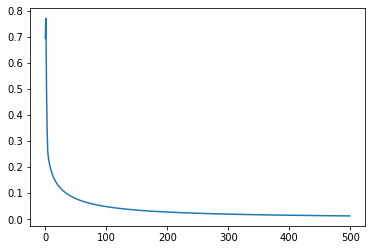

In [25]:
plt.plot(error_list)


In [26]:
opt_theta


array([[5.38282715],
       [1.19101276],
       [1.12250365]])

In [27]:
x1_rv = np.arange(-4, 5)
#generating random vlaues so can put up in formula
# theta0x0+theta1x1+theta2x2=0

In [28]:
x2_rv = - (opt_theta[0] + opt_theta[1]*x1_rv) / opt_theta[2]


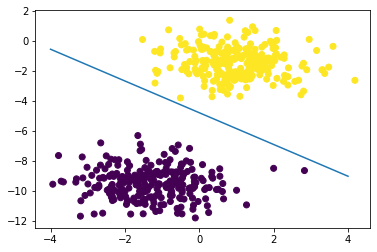

In [29]:
plt.scatter(X[:, 0], X[:, 1], c = y.reshape(-1,)) #this is for y is m,1 500,1 so we reshape it
plt.plot(x1_rv, x2_rv)
plt.show()

In [30]:
y_pred = hypothesis(X_test, opt_theta)


In [31]:
opt_theta

array([[5.38282715],
       [1.19101276],
       [1.12250365]])

In [32]:
y_pred

array([[6.12635398e-03],
       [9.97997305e-01],
       [9.90442410e-01],
       [3.49723599e-04],
       [4.14752225e-03],
       [9.99484263e-01],
       [3.57390457e-03],
       [9.45349263e-01],
       [9.29843826e-01],
       [9.99184065e-01],
       [6.94650862e-03],
       [9.36646736e-01],
       [9.99647988e-01],
       [9.95582814e-01],
       [1.12135199e-02],
       [9.96776109e-01],
       [9.71831593e-01],
       [9.52496543e-01],
       [1.36671932e-04],
       [2.90688245e-04],
       [1.72841547e-03],
       [8.34083385e-01],
       [2.02202197e-03],
       [7.89580669e-03],
       [9.81868757e-01],
       [1.26777873e-04],
       [9.99398486e-01],
       [9.98131430e-01],
       [9.65930028e-05],
       [9.98169515e-01],
       [9.93665926e-01],
       [6.23031432e-01],
       [2.49374132e-04],
       [9.97859652e-01],
       [9.95565527e-01],
       [8.52537861e-04],
       [9.90518504e-01],
       [5.04664758e-04],
       [4.11651704e-03],
       [2.66804690e-03],


In [33]:
y_pred = np.round(y_pred).astype('int')
#this is just rounding off and taking val to  int 
#bcz prob. is coming from y_pred

In [34]:
# Accuracy
(y_pred == y_test).mean()

1.0

# sklearn Logistic Reg

In [35]:
from sklearn.linear_model import LogisticRegression


In [36]:
model = LogisticRegression()


In [37]:
model.fit(X_train, y_train)


C:\Users\ARYAN GULATI\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [38]:
model.score(X_test, y_test)


1.0

In [39]:
ypred = model.predict(X_test)


In [40]:
model.intercept_


array([9.25520576])

In [41]:
model.coef_


array([[-1.21790800e-06,  5.60363665e-01,  1.72723229e+00]])